### 문제 정의
- 글로벌소프트웨어 엔지니어가 되는 것이 꿈입니다.
- 소프트웨어 엔지니어가 많은 나라일 수록 취업 기회가 더 많을 것같습니다.
- 어떤 기술을 배워야 할지 알기 위해 연령대별로 현재 소프트웨어 엔지니어가 사용하는 사용하는 프로그래밍언어의 종류도 알고 싶습니다.

### 1. 데이터 수집

### 1.1 데이터 조사 및 확인
1. 개발자 설문조사 결과 검색
> google : 'developer survey result'
> 스택오버플로 사이트 확인
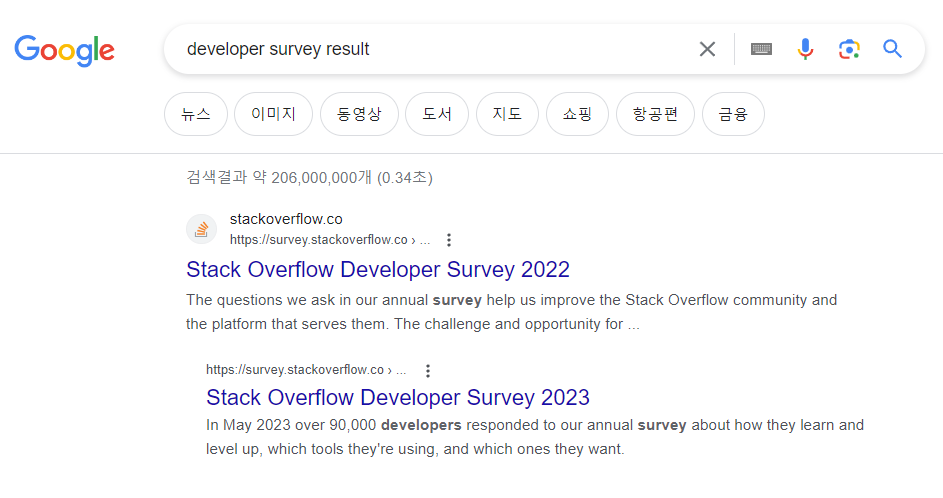

> https://survey.stackoverflow.co/2023/
> 설문조사 개요 페이지 방문
> 2023년 5월, 90,000명 개발자가 설문 응답
> 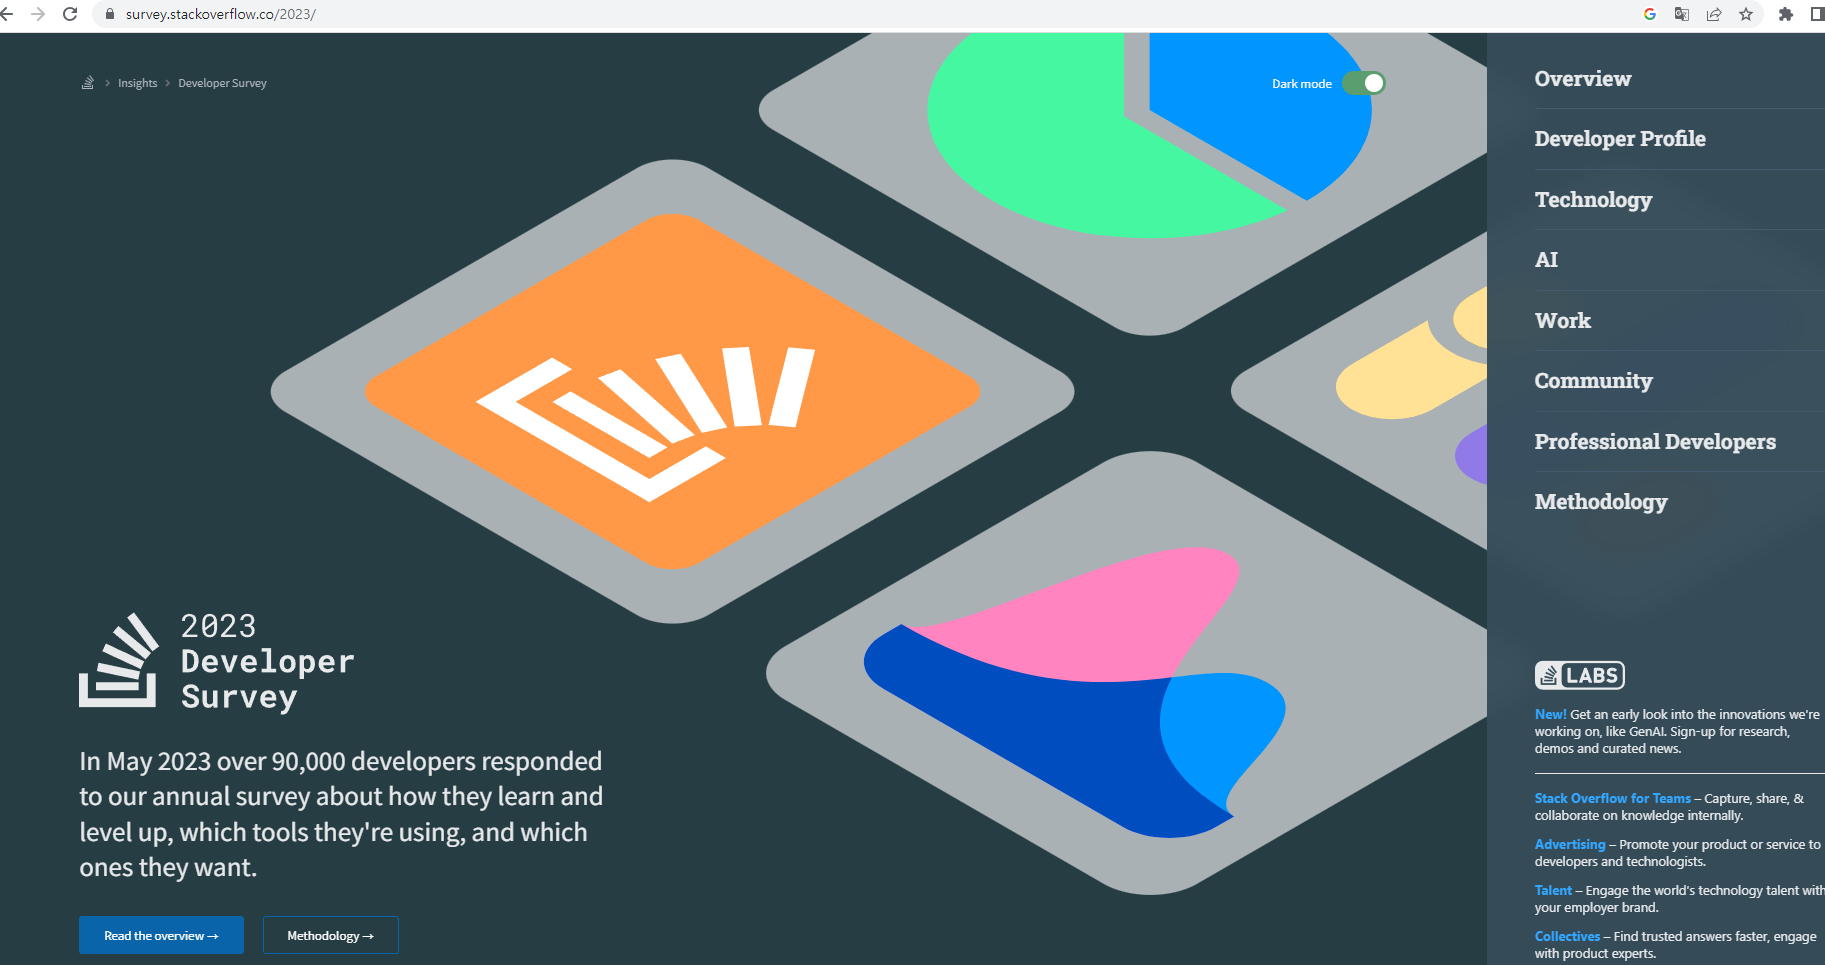

### 연령대별 프로그래밍 학습 방법
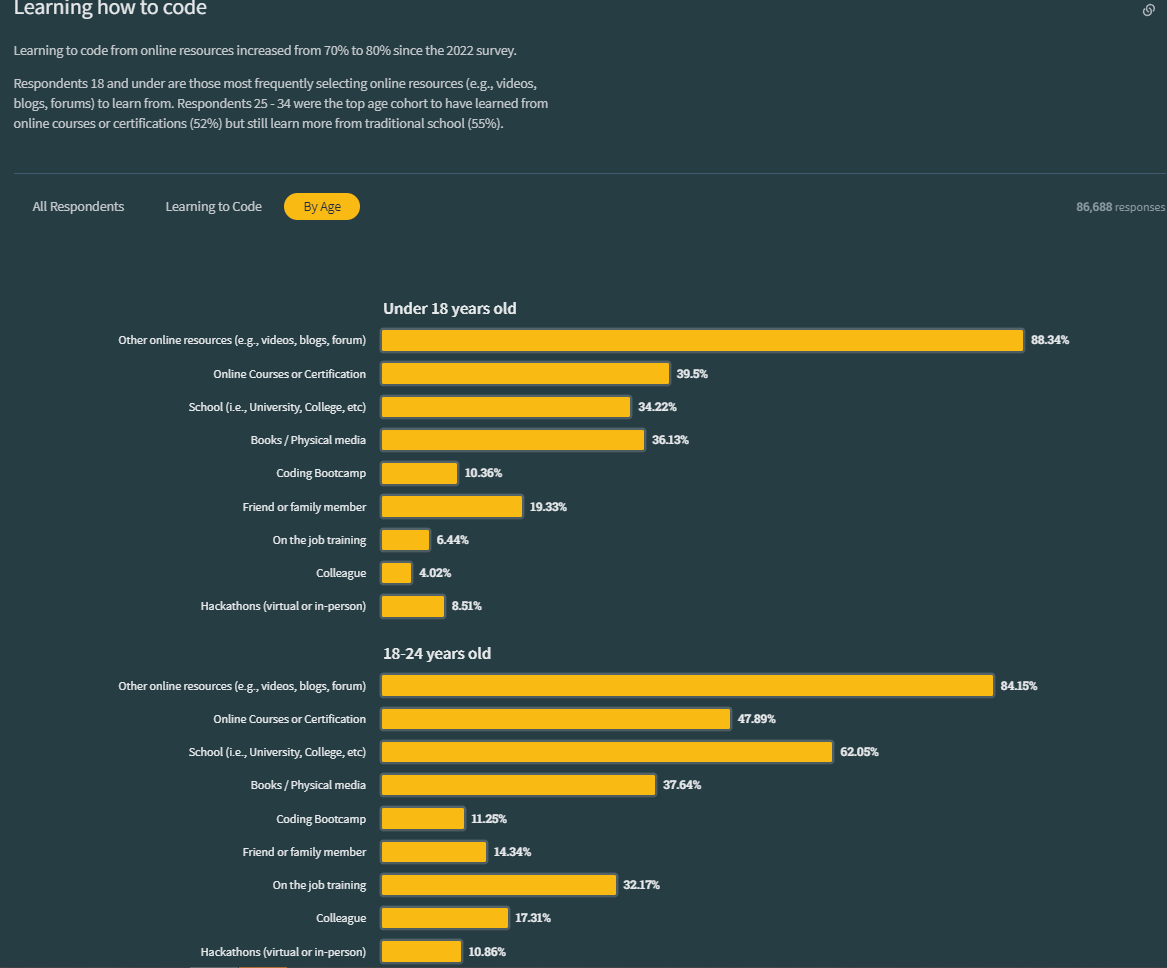

### 설문 응답 국가
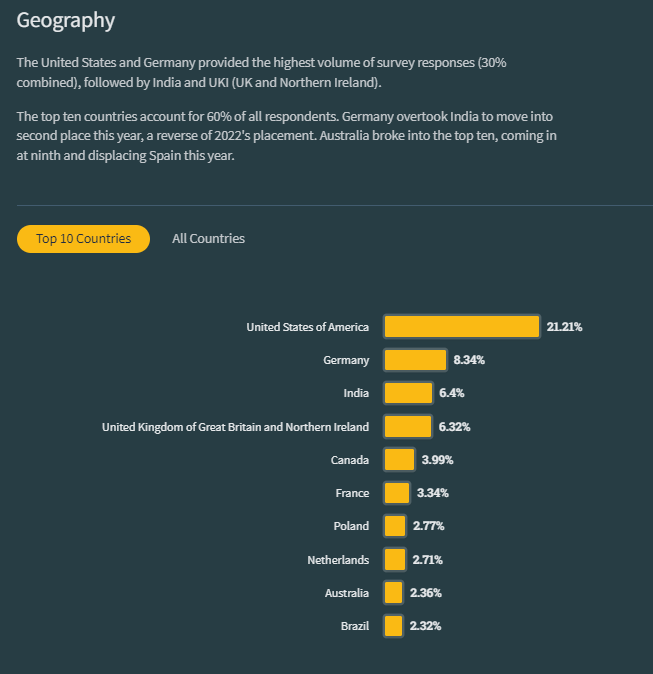
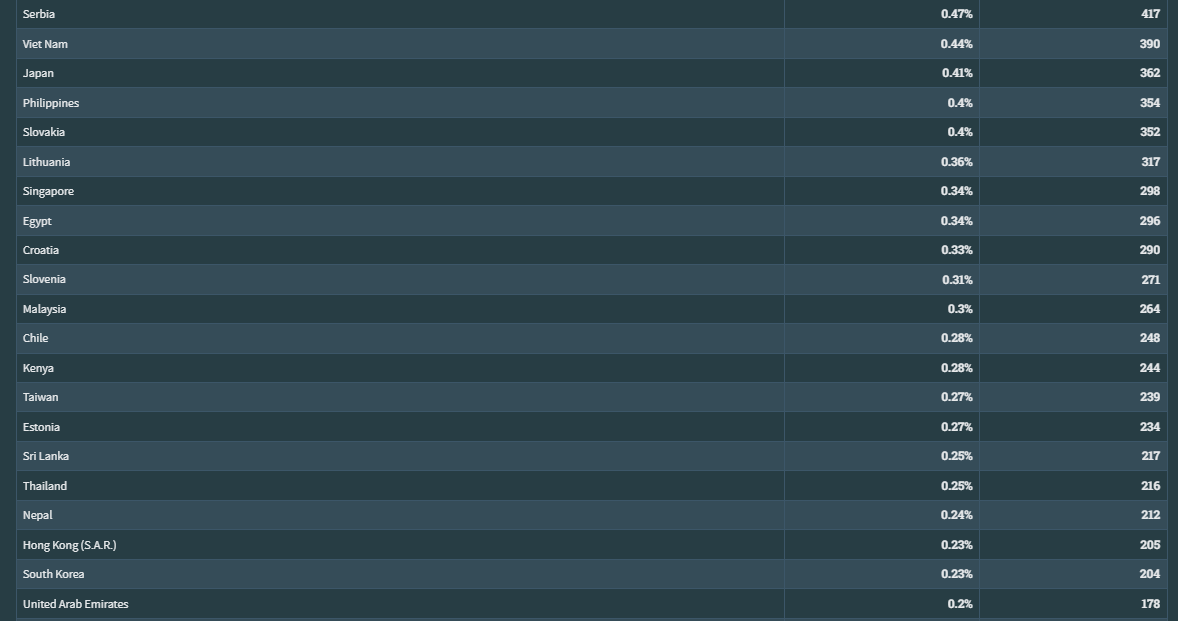

### 프로그래밍 언어 선호 비율
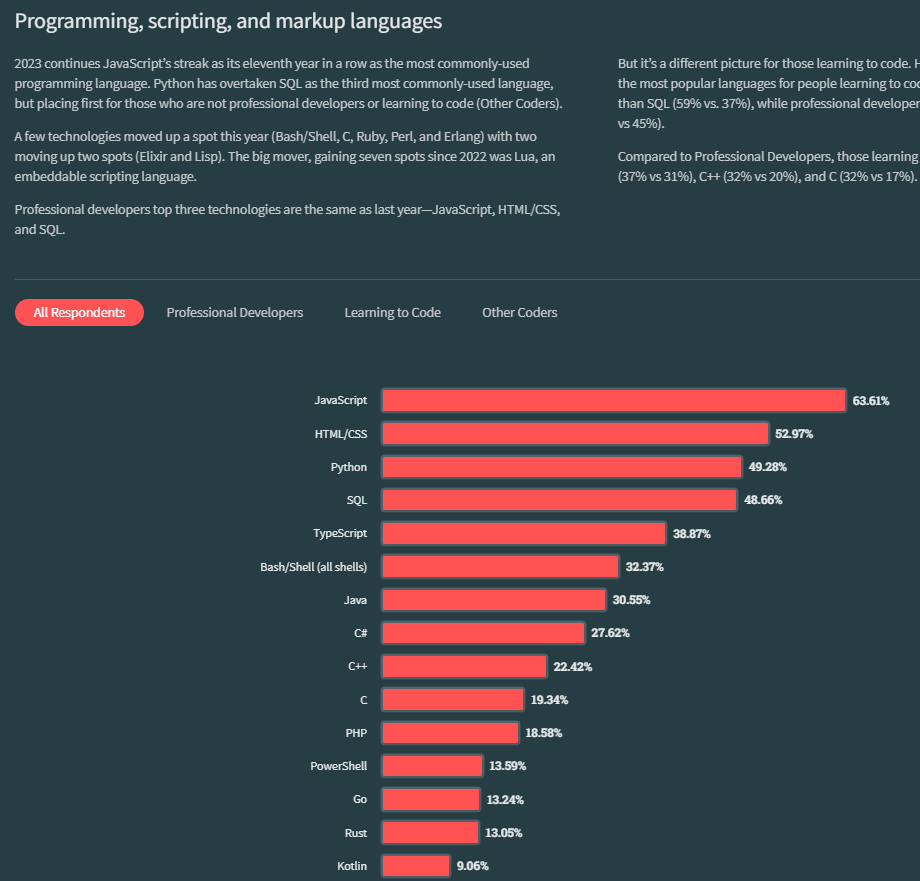

### 2. 데이터 다운로드 및 탑재 준비
 - 스택오버플로에서 진행하는 개발자 설문조사 데이터 ( https://insights.stackoverflow.com/survey )
 - 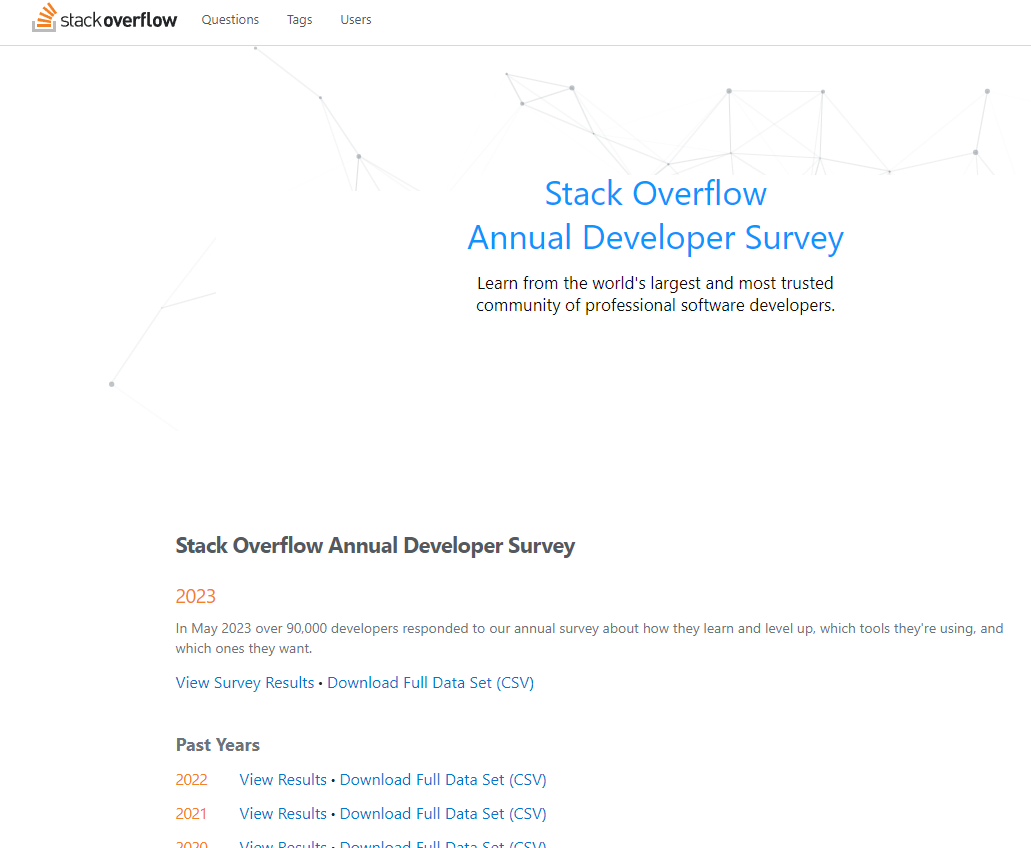

 - 다음의 4가지 파일로 구성됨
  1. RAEDME_2023.txt : 다운로드 파일에 대한 설명
  2. so_survey_2023.pdf : 설문조사 질문지
  3. survey_results_public.csv : 취합 결과
  4. survey_results_schema.csv : so_survey_2023.pdf 파일을 웹으로 표현한 파일


### 3. 데이터 읽어오기

In [1]:
# Pandas 패키기 로드
import pandas as pd

# 설문지 취합 결과 파일 읽어오기
raw_data = pd.read_csv('survey_results_public.csv')

In [2]:
# 데이터 확인
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

### 3. 데이터 정제 및 가공

In [4]:
# 데이터 확인
raw_data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
# 나이, 국가, 다룰 줄 아는 프로그래밍 언어, 프로그래밍을 배운 방법 변수만 추출
# 나이 - Age, 
# 국가 - Country, 
# 다룰 줄 아는 프로그래밍 언어 - LanguageHaveWorkedWith
# 프로그래밍을 배운 방법 - LearnCode

revised_data = raw_data[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode']]

revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,18-24 years old,NaN,NaN,NaN
1,25-34 years old,United States of America,HTML/CSS;JavaScript;Python,Books / Physical media;Colleague;Friend or fam...
2,45-54 years old,United States of America,Bash/Shell (all shells);Go,Books / Physical media;Colleague;On the job tr...
3,25-34 years old,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Colleague;Friend or family member;Other online...
4,25-34 years old,Philippines,HTML/CSS;JavaScript;TypeScript,Books / Physical media;Online Courses or Certi...


In [6]:
# 응답자 연령대 확인하기
# 89,184명이 응답
revised_data['Age']

0           18-24 years old
1           25-34 years old
2           45-54 years old
3           25-34 years old
4           25-34 years old
                ...        
89179       25-34 years old
89180       18-24 years old
89181     Prefer not to say
89182    Under 18 years old
89183       35-44 years old
Name: Age, Length: 89184, dtype: object

In [9]:
# 응답자 연령대 확인하기
# 중복 데이터 확인 - 8개 데이터 응답 유형 존재
revised_data['Age'].unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [12]:
# 나이 대별 설문 참여 수 확인
revised_data.groupby(['Age']).size()

Age
18-24 years old       17931
25-34 years old       33247
35-44 years old       20532
45-54 years old        8334
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Under 18 years old     4128
dtype: int64

In [13]:
# 국가별 설문 참여 수 확인
revised_data.groupby(['Country']).size()

Country
Afghanistan                              64
Albania                                  60
Algeria                                  85
Andorra                                  16
Angola                                   13
                                       ... 
Venezuela, Bolivarian Republic of...    106
Viet Nam                                390
Yemen                                    20
Zambia                                   26
Zimbabwe                                 34
Length: 185, dtype: int64

In [14]:
# 응답에 참여한 국가 이름 확인
revised_data['Country'].unique()

array([nan, 'United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       '

In [19]:
# 대한민국 응답자 수 확인 - 204명
revised_data.query('Country == "South Korea"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 978 to 88859
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     204 non-null    object
 1   Country                 204 non-null    object
 2   LanguageHaveWorkedWith  202 non-null    object
 3   LearnCode               204 non-null    object
dtypes: object(4)
memory usage: 8.0+ KB


### 4. 데이터 시각화

### 4.1 연령대별 응답자 수 그래프 그리기

In [20]:
# 연령대별 설문 참여 수 확인
size_by_age = revised_data.groupby(['Age']).size()

# 시리즈로 반환
size_by_age

Age
18-24 years old       17931
25-34 years old       33247
35-44 years old       20532
45-54 years old        8334
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Under 18 years old     4128
dtype: int64

In [21]:
type(size_by_age)

pandas.core.series.Series

<AxesSubplot:xlabel='Age'>

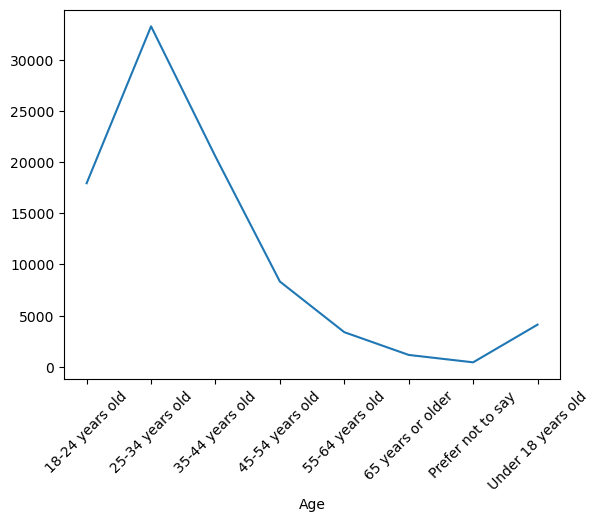

In [22]:
# 라인 그래프 그리기
size_by_age.plot.line(rot=45)

<AxesSubplot:xlabel='Age'>

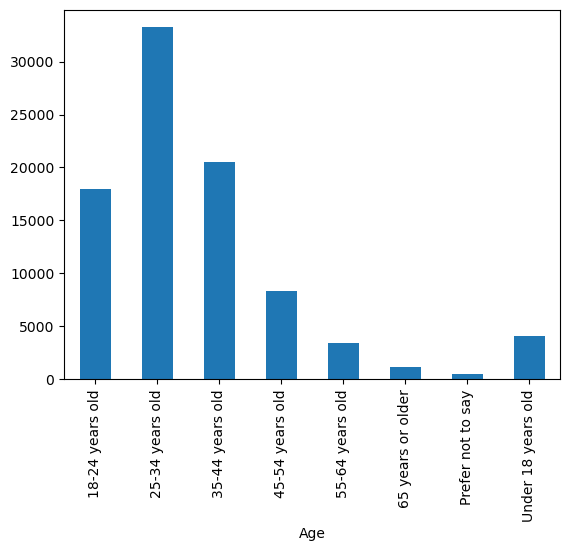

In [23]:
# 수직 막대 그래프 그리기
size_by_age.plot.bar()

<AxesSubplot:ylabel='Age'>

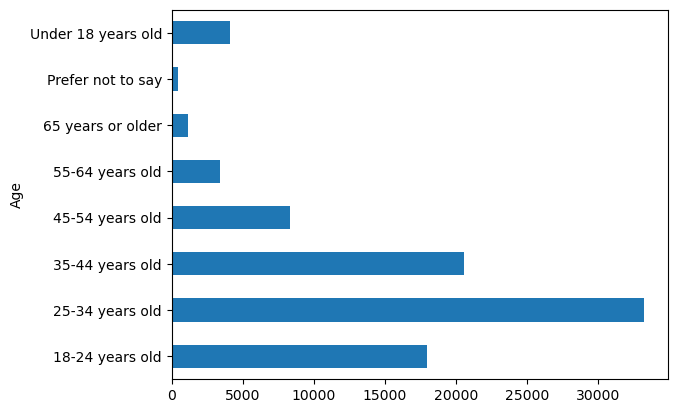

In [24]:
# 수평 막대 그래프 그리기
size_by_age.plot.barh()

In [25]:
# 색인 확인하기
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [26]:
# 색인 순서 변경하기
reindex_size_by_age = size_by_age.reindex(index = [
    'Prefer not to say', 
    '18-24 years old', 
    '25-34 years old', 
    '35-44 years old',
    '45-54 years old', 
    '55-64 years old', 
    '65 years or older',
    'Under 18 years old'])

In [27]:
# 색인 순서 변경 확인하기
reindex_size_by_age.index

Index(['Prefer not to say', '18-24 years old', '25-34 years old',
       '35-44 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Under 18 years old'],
      dtype='object', name='Age')

<AxesSubplot:ylabel='Age'>

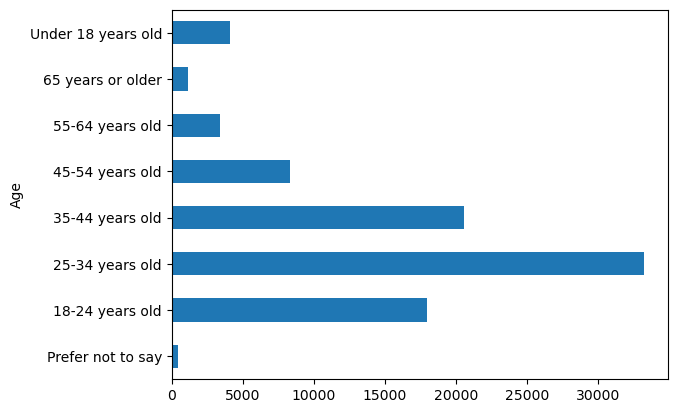

In [29]:
# 색인 순서 변경 확인하기
reindex_size_by_age.plot.barh()

### 4.2 국가별 응답자 수 그래프 그리기

In [30]:
# 국가별 설문 참여 수 확인
size_by_country = revised_data.groupby(['Country']).size()
size_by_country.head()

Country
Afghanistan    64
Albania        60
Algeria        85
Andorra        16
Angola         13
dtype: int64

<AxesSubplot:ylabel='None'>

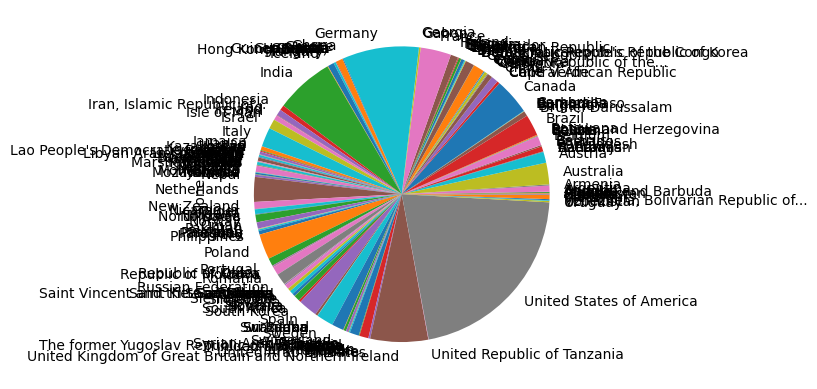

In [32]:
# Pie 그래프 그리기
size_by_country.plot.pie()

<AxesSubplot:ylabel='None'>

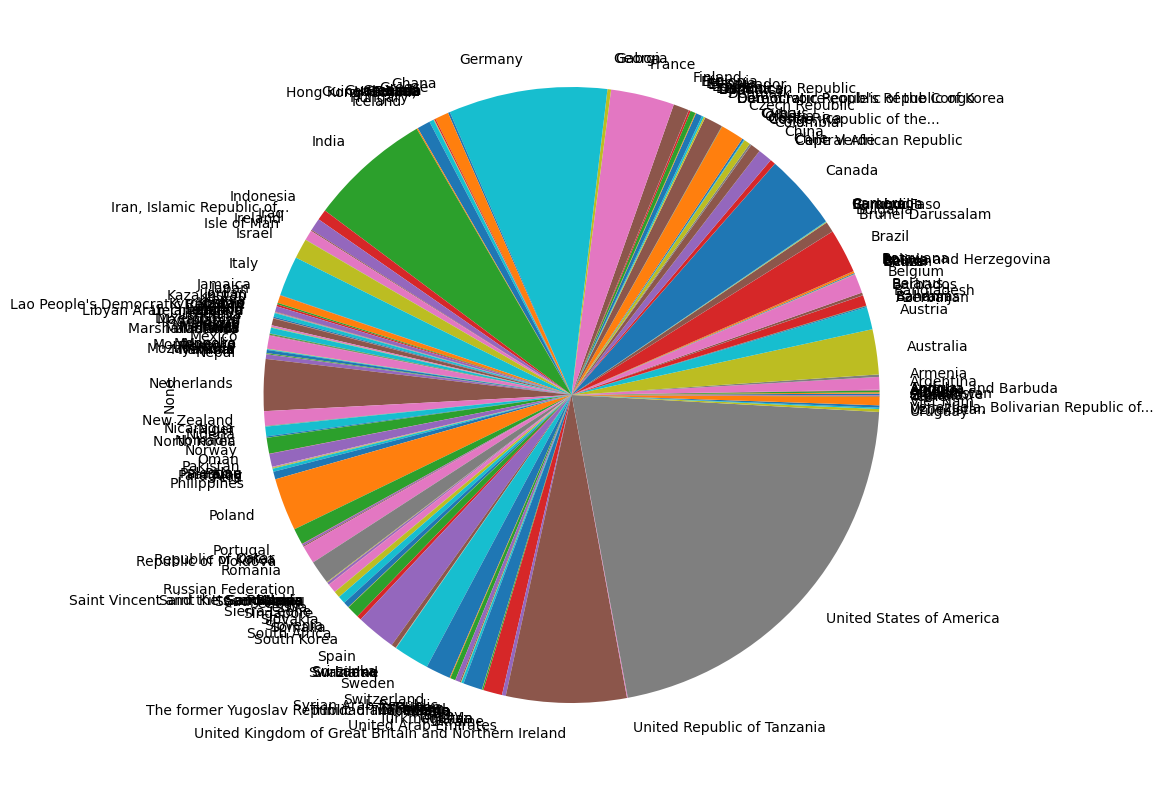

In [36]:
# Pie 그래프 크기 조정하기
# 가로, 세로 10인치로 조정
size_by_country.plot.pie(figsize=(10, 10))

In [37]:
# 상위 20개국 확인
size_by_country.head()

Country
Afghanistan    64
Albania        60
Algeria        85
Andorra        16
Angola         13
dtype: int64

In [39]:
# 상위 20개국 확인
size_by_country.sort_values(ascending=False)

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Grenada                                                     1
Guinea-Bissau                                               1
Liechtenstein                                               1
Marshall Islands                                            1
Saint Kitts and Nevis                                       1
Length: 185, dtype: int64

In [41]:
# 상위 20개국 확인
size_by_country.nlargest(20)

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Czech Republic                                           1072


<AxesSubplot:ylabel='None'>

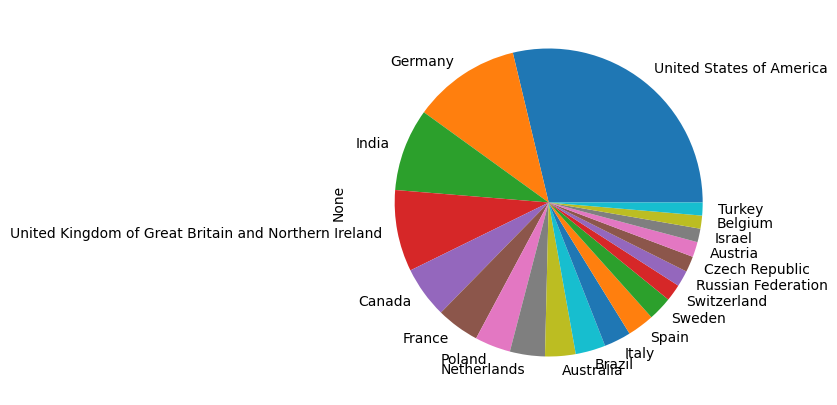

In [43]:
# 상위 20개국 파이 그래프 그리기
size_by_country.sort_values(ascending=False).head(20).plot.pie(figsize=(5, 5))

<AxesSubplot:ylabel='None'>

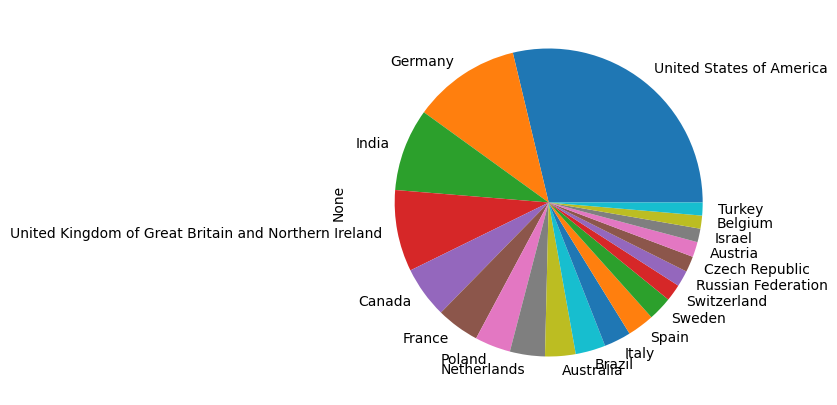

In [44]:
# 상위 20개국 파이 그래프 그리기
size_by_country.nlargest(20).plot.pie(figsize=(5, 5))

### 4.3 많이 사용하는 프로그래밍 언어 그래프 그리기

In [45]:
# 프로그래밍 언어 데이터 추출
# ';'으로 구분되어 있음을 확인
languages = revised_data['LanguageHaveWorkedWith']

languages.head()

0                                                  NaN
1                           HTML/CSS;JavaScript;Python
2                           Bash/Shell (all shells);Go
3    Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4                       HTML/CSS;JavaScript;TypeScript
Name: LanguageHaveWorkedWith, dtype: object

In [46]:
# 데이터 문자열을 구분자(';')로 구분
# 구분된 문자열은 리스트로 반환됨
languages = languages.str.split(';')

languages.head()

0                                                  NaN
1                       [HTML/CSS, JavaScript, Python]
2                        [Bash/Shell (all shells), Go]
3    [Bash/Shell (all shells), HTML/CSS, JavaScript...
4                   [HTML/CSS, JavaScript, TypeScript]
Name: LanguageHaveWorkedWith, dtype: object

In [48]:
# 데이터 문자열을 구분자(';')로 구분하고
# 구분된 문자열은 리스트로 반환됨
# 리스트의 각 항목을 행으로 나누기

exploded_languages = languages.explode()

exploded_languages.head()

0                        NaN
1                   HTML/CSS
1                 JavaScript
1                     Python
2    Bash/Shell (all shells)
Name: LanguageHaveWorkedWith, dtype: object

In [49]:
# 프로그래밍별 응답수 구하기
exploded_languages.unique()

array([nan, 'HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)',
       'Go', 'PHP', 'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure',
       'Elixir', 'Java', 'Lisp', 'OCaml', 'Raku', 'Scala', 'Swift', 'Zig',
       'Rust', 'C#', 'PowerShell', 'C++', 'Kotlin', 'Solidity', 'C',
       'Perl', 'Dart', 'Haskell', 'Assembly', 'Delphi', 'R', 'Lua',
       'MATLAB', 'VBA', 'Visual Basic (.Net)', 'Julia', 'F#', 'Groovy',
       'APL', 'Objective-C', 'GDScript', 'Crystal', 'Cobol', 'Fortran',
       'Prolog', 'Erlang', 'Apex', 'SAS', 'Nim', 'Flow'], dtype=object)

In [56]:
# 프로그래밍별 응답수 구하기
size_by_language = exploded_languages.to_frame()
size_by_language

,LanguageHaveWorkedWith
0,NaN
1,HTML/CSS
1,JavaScript
1,Python
2,Bash/Shell (all shells)
...,...
89183,C#
89183,Go
89183,JavaScript
89183,SQL


In [57]:
# 프로그래밍별 응답수 구하기
size_by_language = size_by_language.groupby('LanguageHaveWorkedWith').size()
size_by_language

LanguageHaveWorkedWith
APL                          225
Ada                          677
Apex                         579
Assembly                    4753
Bash/Shell (all shells)    28351
C                          16940
C#                         24193
C++                        19634
Clojure                     1105
Cobol                        576
Crystal                      389
Dart                        5273
Delphi                      2831
Elixir                      2028
Erlang                       868
F#                           849
Flow                         214
Fortran                      833
GDScript                    1495
Go                         11592
Groovy                      2976
HTML/CSS                   46396
Haskell                     1829
Java                       26757
JavaScript                 55711
Julia                       1010
Kotlin                      7935
Lisp                        1342
Lua                         5336
MATLAB              

<AxesSubplot:ylabel='None'>

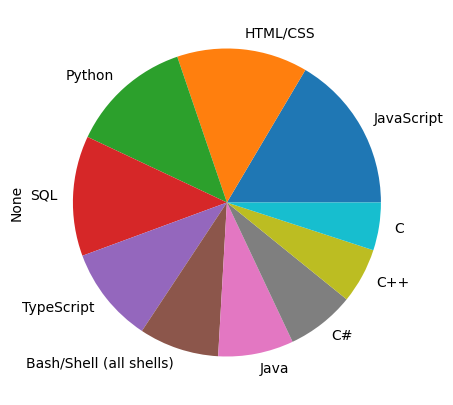

In [58]:
# 상위 10개 프로그래밍 언어를 파이 그래프로 그리기
size_by_language.nlargest(10).plot.pie(figsize=(5, 5))

<AxesSubplot:ylabel='None'>

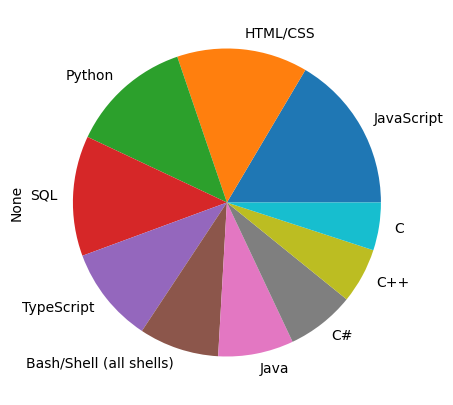

In [60]:
# 상위 10개 프로그래밍 언어를 파이 그래프로 그리기
size_by_language.sort_values(ascending=False).head(10).plot.pie(figsize=(5, 5))

<AxesSubplot:ylabel='None'>

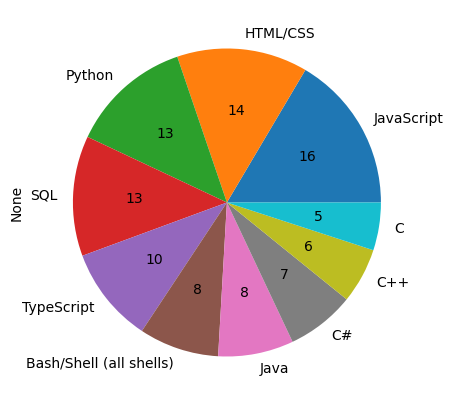

In [61]:
# 백분율 표기하기
size_by_language.sort_values(ascending=False).head(10).plot.pie(figsize=(5, 5), autopct='%1.0f')

In [62]:
# 원하는 연령대 데이터만 추출해서 그래프 그리기
revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,18-24 years old,NaN,NaN,NaN
1,25-34 years old,United States of America,HTML/CSS;JavaScript;Python,Books / Physical media;Colleague;Friend or fam...
2,45-54 years old,United States of America,Bash/Shell (all shells);Go,Books / Physical media;Colleague;On the job tr...
3,25-34 years old,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Colleague;Friend or family member;Other online...
4,25-34 years old,Philippines,HTML/CSS;JavaScript;TypeScript,Books / Physical media;Online Courses or Certi...


In [65]:
# 원하는 연령대 데이터(25-34 years old)만 추출해서 그래프 그리기
language_for_25_34 = revised_data.query('Age == "25-34 years old"')
language_for_25_34.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
1,25-34 years old,United States of America,HTML/CSS;JavaScript;Python,Books / Physical media;Colleague;Friend or fam...
3,25-34 years old,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Colleague;Friend or family member;Other online...
4,25-34 years old,Philippines,HTML/CSS;JavaScript;TypeScript,Books / Physical media;Online Courses or Certi...
7,25-34 years old,United States of America,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,Books / Physical media;Online Courses or Certi...
9,25-34 years old,India,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Books / Physical media;Online Courses or Certi...


In [68]:
language_for_25_34 = revised_data.query('Age == "25-34 years old"')['LanguageHaveWorkedWith'].str.split(';').explode()
language_for_25_34.head()

1                   HTML/CSS
1                 JavaScript
1                     Python
3    Bash/Shell (all shells)
3                   HTML/CSS
Name: LanguageHaveWorkedWith, dtype: object

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

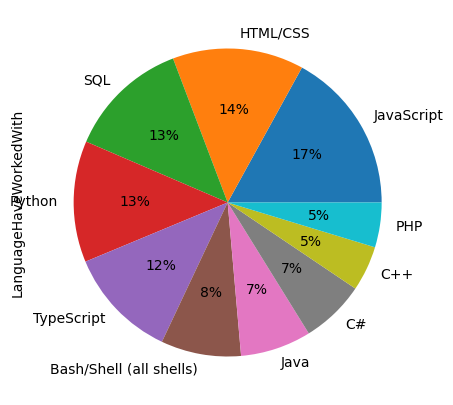

In [69]:
# 상위 10개만 추출하여 파이 그래프 그리기
language_for_25_34.groupby(language_for_25_34).size().nlargest(10).plot.pie(figsize=(5, 5), autopct='%1.0f%%')

<AxesSubplot:ylabel='LanguageHaveWorkedWith'>

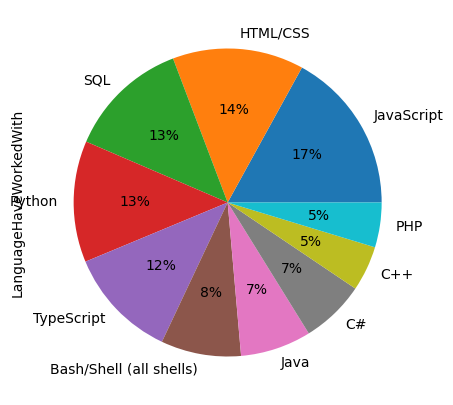

In [71]:
# 상위 10개만 추출하여 파이 그래프 그리기
language_for_25_34.groupby(language_for_25_34).size().sort_values(ascending=False).head(10).\
plot.pie(figsize=(5, 5), autopct='%1.0f%%')

### 과제-1 :
> 설문에 응답한 개발자들이 어떻게 프로그래밍을 학습했는지 알고싶다

> LearnCode 데이터를 활용하여 백분율로 표기한 파이 그래프를 그려보자

### 과제-2 :
> 과제-1의 파이그래프를 연령대가 25~34세를 대상으로 백분율로 표기한 파이 그래프를 그려보자
